In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
class Point:
  def __init__(self,cordinates,position,neighbor_points,cluster):
    self.cordinates = cordinates
    self.position = position
    self.neighbor_points = neighbor_points
    self.cluster = cluster

In [28]:
class DBSCAN:

  def __init__(self,eps,min_points):
    self.eps = eps
    self.min_points = min_points

  def _assign_position(self,X,point):
    neighbor_points = []
    point_pos = 0

    for i in range(len(X)):
      dist = 0
      for j in range(len(X[i])):
        dist += (X[i][j] - point[j])**2
      dist = np.sqrt(dist)

      if dist <= self.eps:
        neighbor_points.append(i)

    if len(neighbor_points) >= self.min_points:
      point_pos = 1
    elif len(neighbor_points) > 1:
      point_pos = 2
    else: point_pos = 3

    return neighbor_points,point_pos

  def fit(self,X):
    current_cluster = 0
    points = []

    for point in X:
      Neighbor_Points, Point_Pos = self._assign_position(X,point)
      points.append(Point(point,Point_Pos,Neighbor_Points,1-Point_Pos))

    for i in range(len(X)):
      if points[i].cluster == 0 :
        current_cluster += 1
        points[i].cluster = current_cluster
        self._find_cluster_points(X,current_cluster,points,i)

    return points

  def _find_cluster_points(self,X, current_cluster, points, i):

    cluster_members = points[i].neighbor_points
    j = 0
    while j < len(cluster_members):
      expention_point = cluster_members[j]
      if points[expention_point].cluster == -1:
        points[expention_point].cluster = current_cluster

      elif points[expention_point].cluster == 0:
        points[expention_point].cluster = current_cluster
        cluster_members += points[expention_point].neighbor_points
      j += 1


In [6]:
X, y = make_blobs(n_samples=1000, centers=[[1, 1], [-1, -1], [1, -1]], cluster_std=0.4, random_state=0)
X[:5]

array([[ 0.58057881,  0.43199283],
       [ 1.70562094,  1.16006288],
       [ 0.8016818 , -0.51336891],
       [-0.15328359, -1.64435136],
       [ 0.70765057, -1.65668129]])

<Axes: title={'center': 'Data Presentation'}>

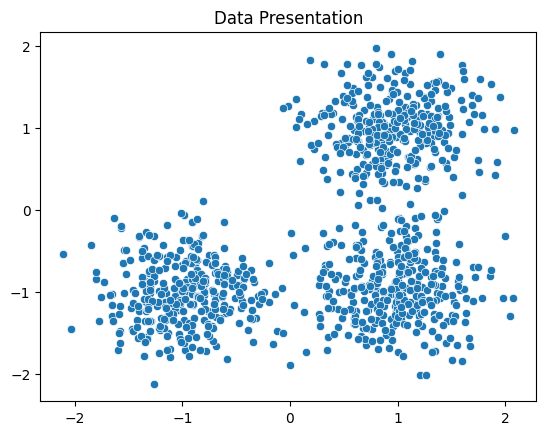

In [26]:
plt.title('Data Presentation')
sns.scatterplot(x= X[:,0],y=X[:,1])

In [29]:
Model = DBSCAN(0.2,5)
Points = Model.fit(X)

In [36]:
cluster = []
for point in Points:
  if point.cluster == -2:
    cluster.append('Outlier')
  elif point.cluster == -1:
    cluster.append('Border Points ')
  else:
    cluster.append(f'Cluster {point.cluster}')

<Axes: >

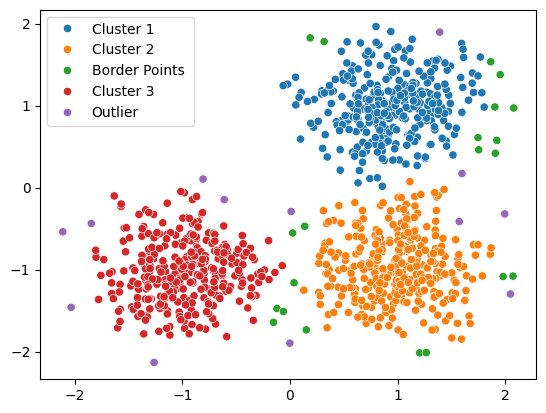

In [37]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=cluster)